Load the dataset into a Pandas DataFrame and explore the data.

In [1]:
import pandas as pd

# load the dataset into a pandas dataframe

path=r'C:\Users\user\Documents\AFRICA DATA SCHOOL\jumta.csv'
df = pd.read_csv(path)


# explore the data
print(df.head()) # display the first 5 rows of the dataframe
print(df.info()) # display the information about the dataframe (column names, data types, non-null values, etc.)
print(df.describe()) # display the summary statistics of the numerical columns in the dataframe


      Month Revenue  Orders  Average_Order_Value
0  Jan-2020  10,000     200                   50
1  Feb-2020  11,000     220                   50
2  Mar-2020  12,000     240                   50
3  Apr-2020  13,000     260                   50
4  May-2020  14,000     280                   50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                24 non-null     object
 1   Revenue              24 non-null     object
 2   Orders               24 non-null     int64 
 3   Average_Order_Value  24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 900.0+ bytes
None
           Orders  Average_Order_Value
count   24.000000                 24.0
mean   430.000000                 50.0
std    141.421356                  0.0
min    200.000000                 50.0
25%    315.000000                 50.0
50%    430.00000

Create a line plot showing the monthly revenue over the two-year period. Customize the plot to make it publication-quality.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset into a pandas dataframe
##df = pd.read_csv('path/to/your/dataset.csv')
path=r'C:\Users\user\Documents\AFRICA DATA SCHOOL\jumta.csv'
df = pd.read_csv(path)

# convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# extract the month and year from the date column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# group the data by month and year, and calculate the total revenue for each group
monthly_revenue = df.groupby(['year', 'month'])['revenue'].sum()

# convert the data to a pandas dataframe
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue['date'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))
monthly_revenue = monthly_revenue[['date', 'revenue']]

# create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(monthly_revenue['date'], monthly_revenue['revenue'], color='blue', linewidth=2)

# set the axis labels and title
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Monthly Revenue', fontsize=12)
ax.set_title('Monthly Revenue over Two-Year Period', fontsize=14)

# format the x-axis ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.xaxis.set_major_formatter(plt.DateFormatter('%b %Y'))

# add a grid and tighten the layout
ax.grid(True)
fig.tight_layout()

# save the plot as a publication-quality PDF file
plt.savefig('monthly_revenue.pdf', dpi=300, bbox_inches='tight')


KeyError: 'date'

In [ ]:
Create a bar plot showing the total number of orders per month. Customize the plot to make it publication-quality.

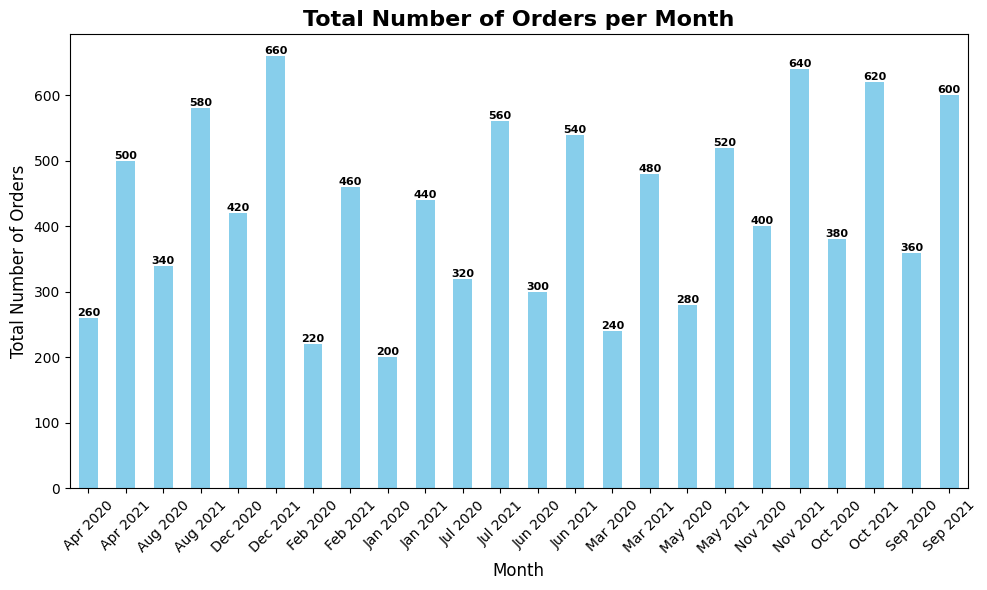

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Month': ['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20',
              'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21',
              'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21'],
    'Orders': [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580,
               600, 620, 640, 660]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Convert the Month column to datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

# Group by month and calculate the total number of orders
monthly_orders = df.groupby(df['Month'].dt.strftime('%b %Y'))['Orders'].sum()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
monthly_orders.plot(kind='bar', color='skyblue', ax=ax)

# Set labels and title
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Number of Orders', fontsize=12)
ax.set_title('Total Number of Orders per Month', fontsize=16, fontweight='bold')

# Set the font size of tick labels
ax.tick_params(axis='both', labelsize=10)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels to each bar
for i, v in enumerate(monthly_orders):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=8)

# Adjust the spacing between subplots to avoid clipping of labels
plt.tight_layout()

# Save the plot as a high-resolution image (300 dpi)
plt.savefig('orders_per_month.png', dpi=300)

# Show the plot
plt.show()
